In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import tensorflow as tf
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer,SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
# Split features and target
X = df.drop(['survived','alive'], axis=1)
y = df['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify column types
num_cols = ['age', 'fare'] 
cat_cols = ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', ]

In [6]:


# Numerical preprocessing
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine them
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [7]:
# Building The Model

#Define The Layers of Model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],))
output_layer=tf.keras.layers.Dense(1,activation='sigmoid')

#Combine The Layers into a Model
model=tf.keras.models.Sequential([
    input_layer,
    output_layer
])

#Compile The Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [8]:
#Train The Model
model.fit(X_train,y_train,epochs=12,batch_size=32,verbose=1)

Epoch 1/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4452 - loss: 0.7383   
Epoch 2/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - loss: 0.6485 
Epoch 3/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7486 - loss: 0.5968 
Epoch 4/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7669 - loss: 0.5620 
Epoch 5/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7753 - loss: 0.5357 
Epoch 6/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7795 - loss: 0.5140 
Epoch 7/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7907 - loss: 0.4953 
Epoch 8/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: 0.4811 
Epoch 9/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - loss: 0.4691 
Epoch 10/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8048 - loss: 0.4598 
Epoch 11/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8104 - loss: 0.4530 
Epoch 12/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [9]:
#Evaluating The Model
loss,accuracy=model.evaluate(X_test,y_test,verbose=1)
print('Test Accuracy',accuracy)
print('loss',loss)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7709 - loss: 0.4750  
Test Accuracy 0.7709497213363647
loss 0.47497648000717163


Epoch 1/102
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4780 - loss: 0.7580 - val_accuracy: 0.5385 - val_loss: 0.7493
Epoch 2/102
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5431 - loss: 0.7344 - val_accuracy: 0.6084 - val_loss: 0.7271
Epoch 3/102
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5782 - loss: 0.7136 - val_accuracy: 0.6364 - val_loss: 0.7060
Epoch 4/102
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5993 - loss: 0.6931 - val_accuracy: 0.6434 - val_loss: 0.6813
Epoch 5/102
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6239 - loss: 0.6678 - val_accuracy: 0.6573 - val_loss: 0.6521
Epoch 6/102
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6678 - loss: 0.6400 - val_accuracy: 0.6993 - val_loss: 0.6203
Epoch 7/102
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7206 - loss: 0.6114 - val_accuracy: 0.7902 - val_loss: 0.5871
Epoch 8/102
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7698 - loss: 0.5834 - val_accuracy: 0.8182 - 

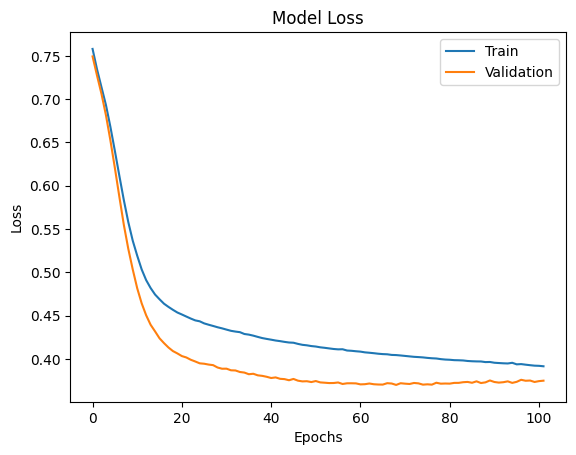

In [15]:
# Building The Model

#Define The Layers of Model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],))
output_layer=tf.keras.layers.Dense(1,activation='sigmoid')

#Combine The Layers into a Model
model=tf.keras.models.Sequential([
    input_layer,
    output_layer
])

#Compile The Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


#Train The Model
history=model.fit(X_train,
                  y_train,
                  epochs=102,
                  batch_size=32,
                  validation_split=0.2,
                  verbose=1)

#Evaluating The Model
loss,accuracy=model.evaluate(X_test,y_test,verbose=1)
print('Test Accuracy',accuracy)
print('loss',loss)

# Plotting training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()